In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
from graphviz import pipe_lines
from mlflow import catboost
from narwhals.selectors import categorical
from pandas.core.common import random_state
from scipy.constants import precision
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import Binarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
pd.options.display.max_columns = None
sklearn.set_config(transform_output='pandas')
from sklearn.metrics import average_precision_score
import mlflow
from catboost import CatBoostRegressor 
mlflow.set_registry_uri('./mlruns')
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from catboost import CatBoostClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

from sklearn.preprocessing import StandardScaler








In [13]:
df = pd.read_csv('data/brain_tumor_dataset.csv')
df

,Patient_ID,Age,Gender,Tumor_Type,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result,Follow_Up_Required
0,1,73,Male,Malignant,5.375612,Temporal,Astrocytoma,III,Vision Issues,Seizures,Seizures,No,No,No,51.312579,0.111876,No,Positive,Yes
1,2,26,Male,Benign,4.847098,Parietal,Glioblastoma,II,Headache,Headache,Nausea,Yes,Yes,Yes,46.373273,2.165736,Yes,Positive,Yes
2,3,31,Male,Benign,5.588391,Parietal,Meningioma,I,Vision Issues,Headache,Seizures,No,No,No,47.072221,1.884228,No,Negative,No
3,4,29,Male,Malignant,1.436600,Temporal,Medulloblastoma,IV,Vision Issues,Seizures,Headache,Yes,No,Yes,51.853634,1.283342,Yes,Negative,No
4,5,54,Female,Benign,2.417506,Parietal,Glioblastoma,I,Headache,Headache,Seizures,No,No,Yes,54.708987,2.069477,No,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,21,Male,Malignant,9.612013,Parietal,Medulloblastoma,III,Seizures,Nausea,Vision Issues,No,No,Yes,58.229662,0.353806,No,Negative,Yes
19996,19997,32,Female,Benign,1.543560,Temporal,Meningioma,III,Headache,Headache,Vision Issues,Yes,Yes,No,77.706856,2.341074,No,Positive,No
19997,19998,57,Female,Benign,3.618634,Temporal,Medulloblastoma,I,Seizures,Vision Issues,Nausea,No,No,Yes,89.543803,2.332881,No,Positive,Yes
19998,19999,68,Male,Malignant,8.519086,Parietal,Glioblastoma,III,Seizures,Headache,Vision Issues,Yes,Yes,Yes,83.306781,2.387202,No,Positive,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Patient_ID           20000 non-null  int64  
 1   Age                  20000 non-null  int64  
 2   Gender               20000 non-null  object 
 3   Tumor_Type           20000 non-null  object 
 4   Tumor_Size           20000 non-null  float64
 5   Location             20000 non-null  object 
 6   Histology            20000 non-null  object 
 7   Stage                20000 non-null  object 
 8   Symptom_1            20000 non-null  object 
 9   Symptom_2            20000 non-null  object 
 10  Symptom_3            20000 non-null  object 
 11  Radiation_Treatment  20000 non-null  object 
 12  Surgery_Performed    20000 non-null  object 
 13  Chemotherapy         20000 non-null  object 
 14  Survival_Rate        20000 non-null  float64
 15  Tumor_Growth_Rate    20000 non-null 

In [5]:
df.dtypes

Patient_ID               int64
Age                      int64
Gender                  object
Tumor_Type              object
Tumor_Size             float64
Location                object
Histology               object
Stage                   object
Symptom_1               object
Symptom_2               object
Symptom_3               object
Radiation_Treatment     object
Surgery_Performed       object
Chemotherapy            object
Survival_Rate          float64
Tumor_Growth_Rate      float64
Family_History          object
MRI_Result              object
Follow_Up_Required      object
dtype: object

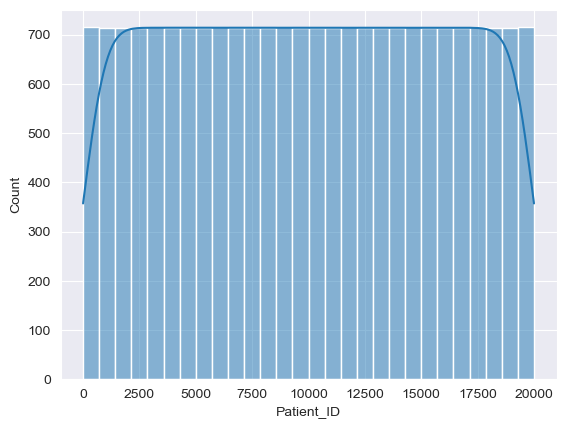

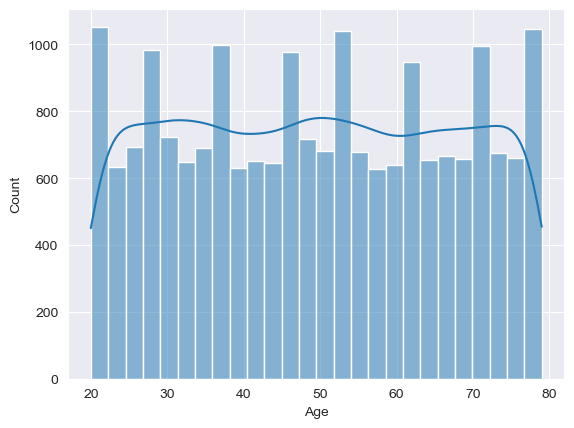

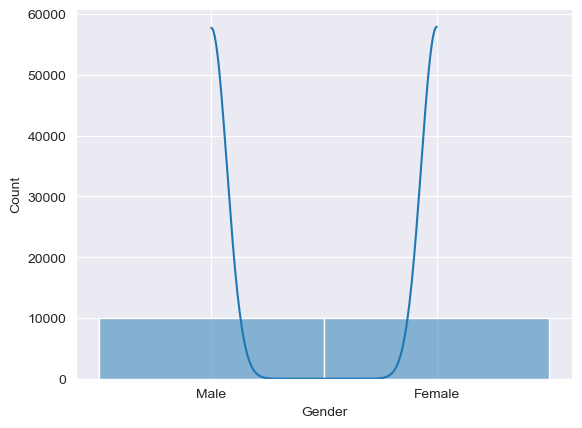

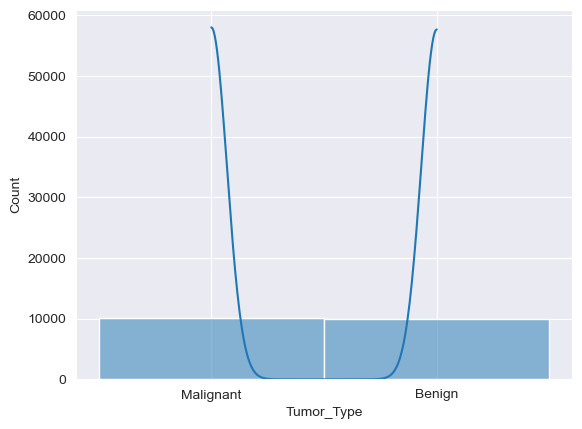

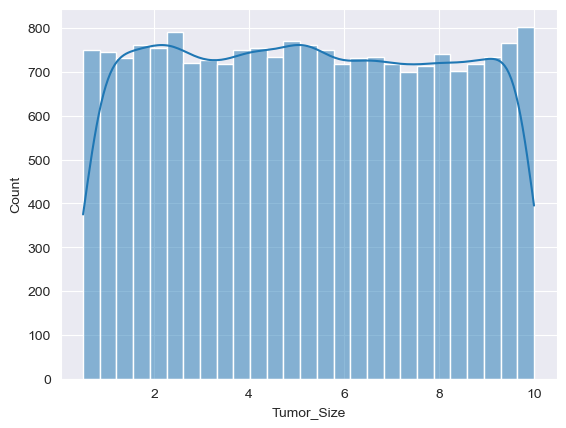

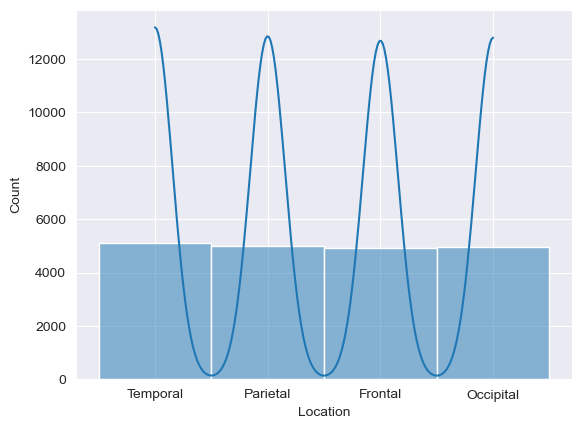

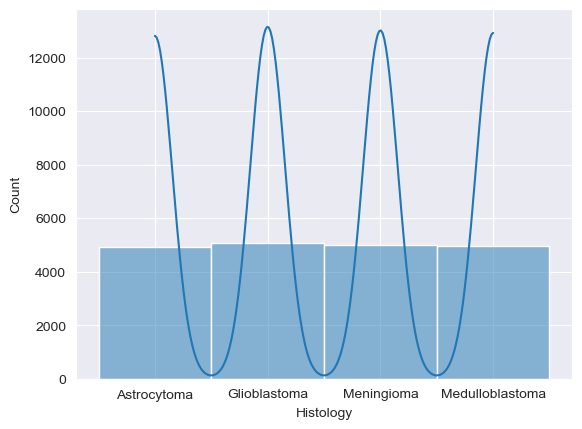

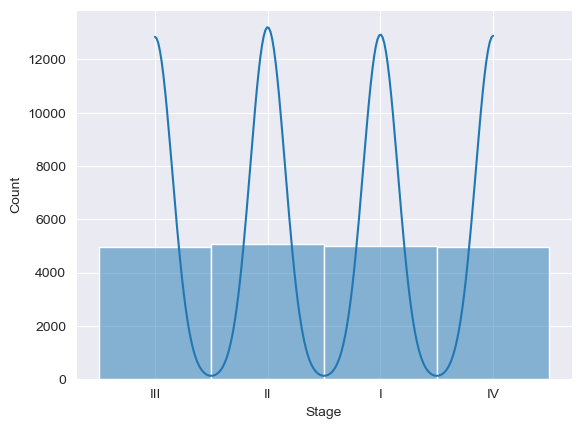

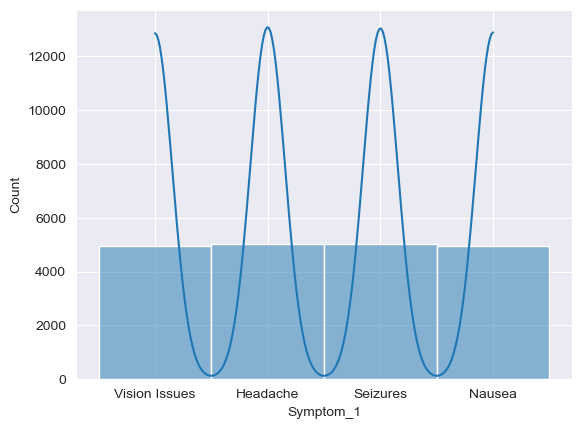

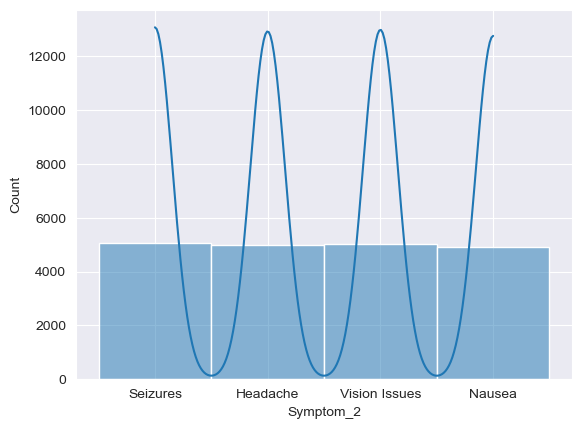

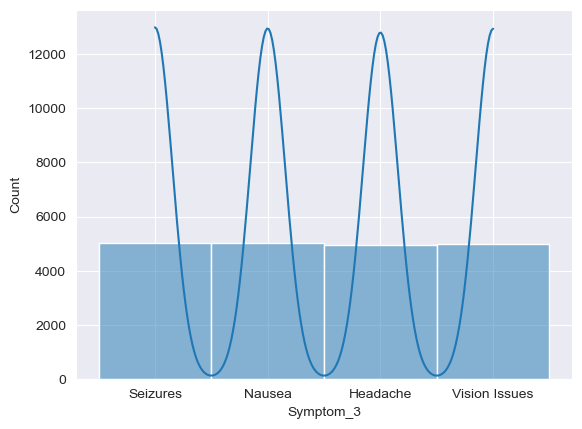

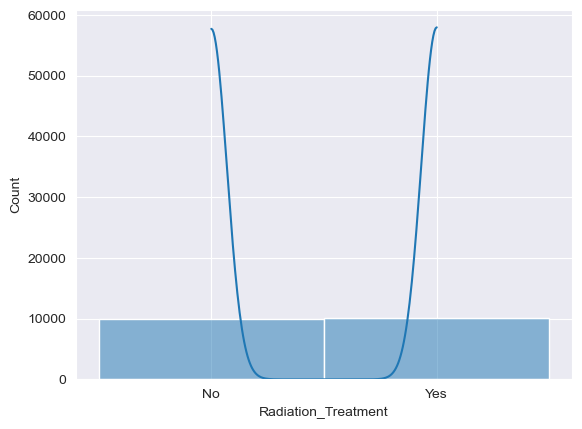

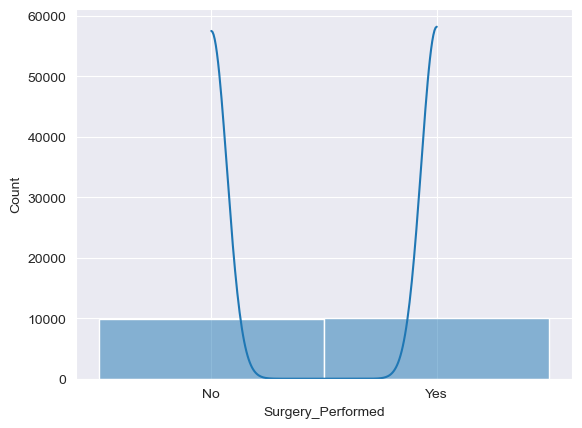

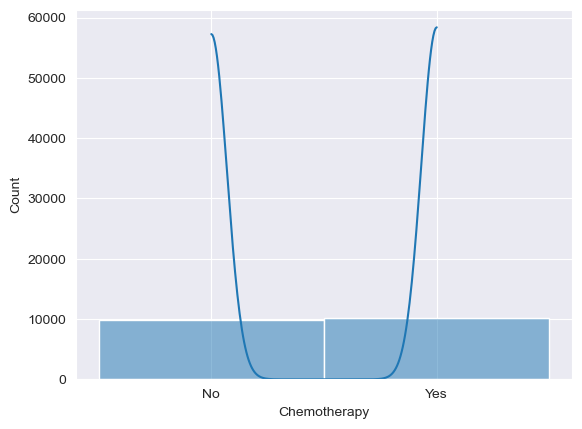

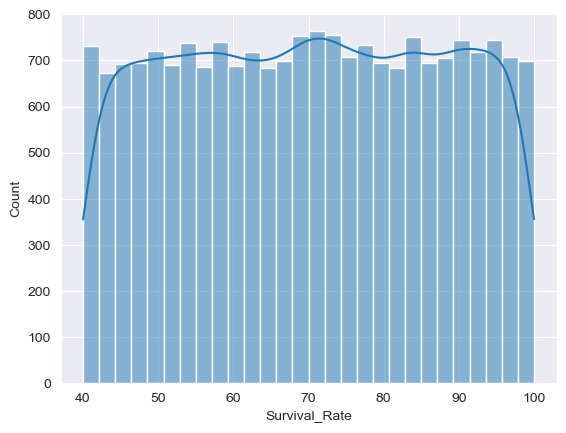

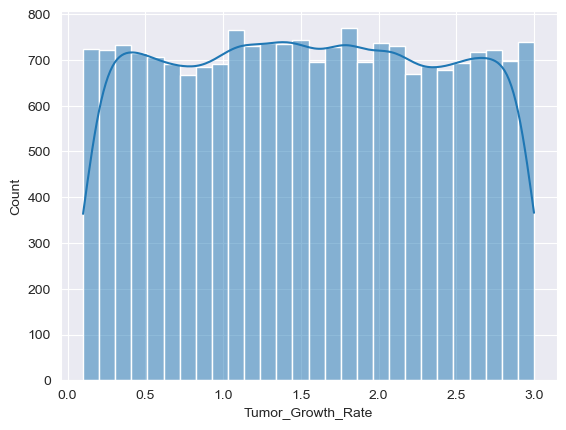

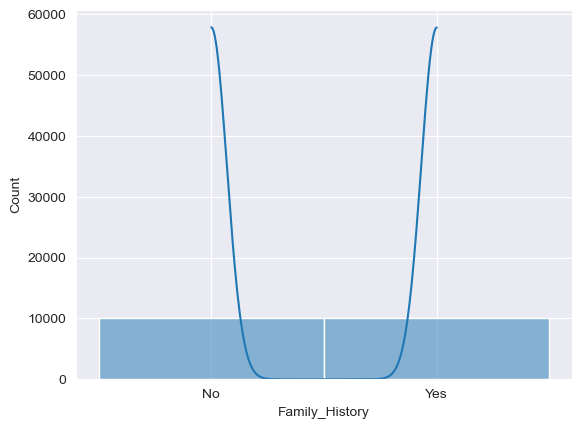

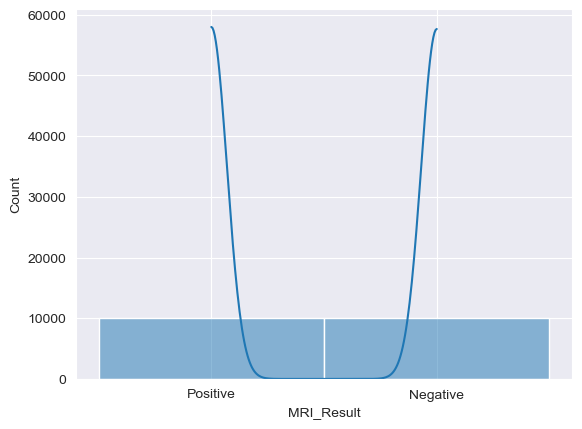

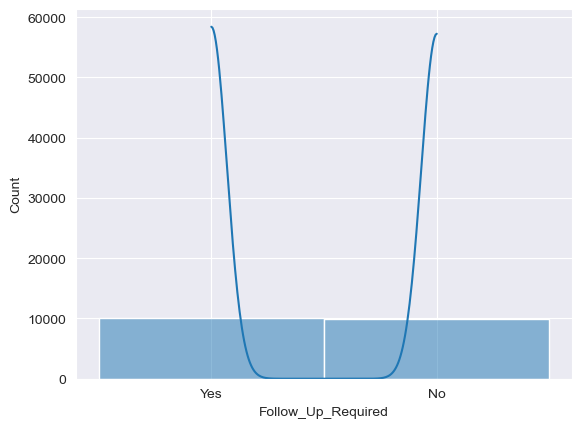

In [6]:
for col in df.columns:
    sns.histplot(data = df, x=col, kde=30)
    plt.show()

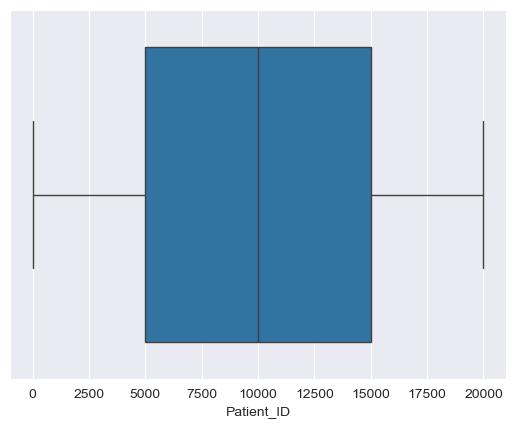

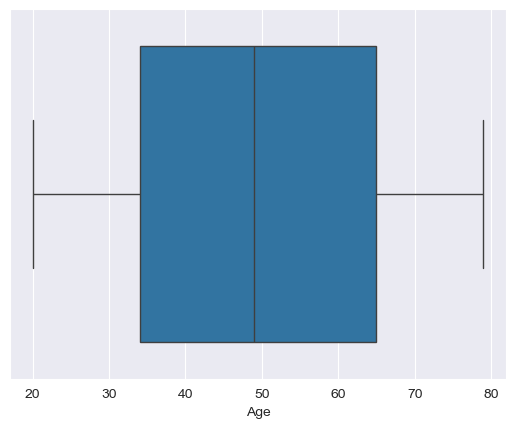

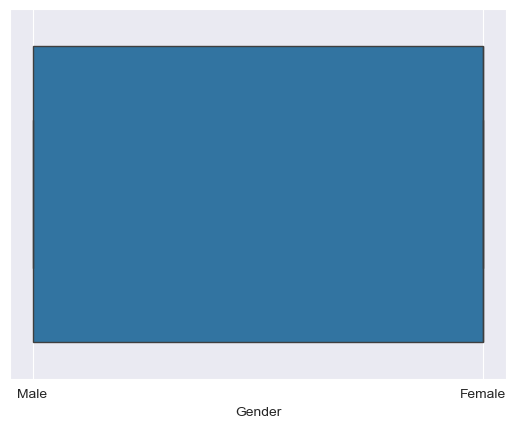

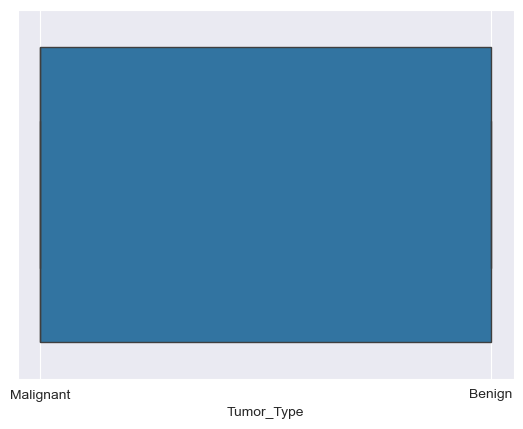

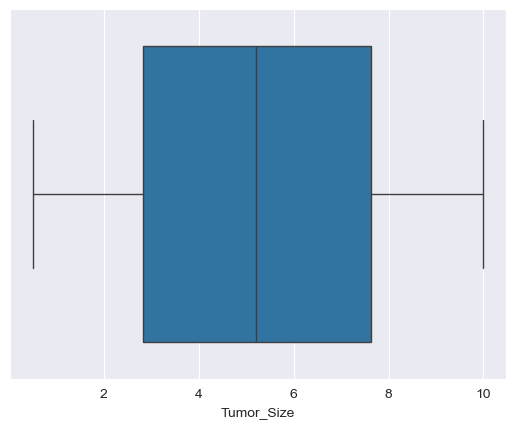

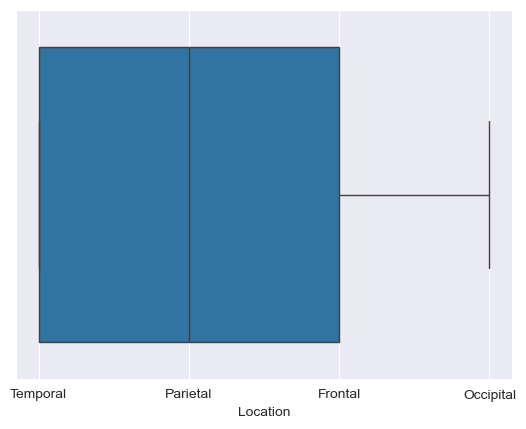

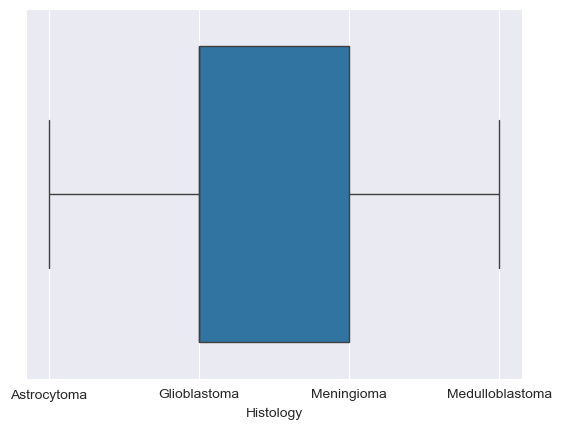

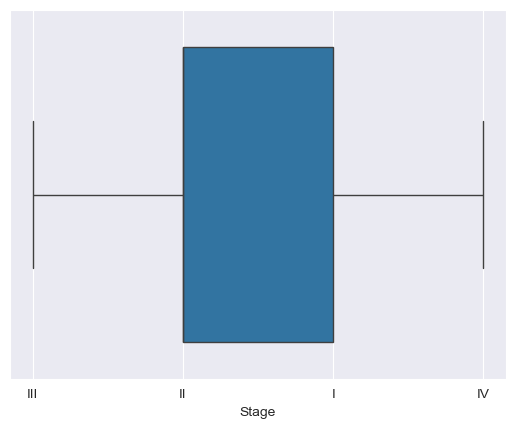

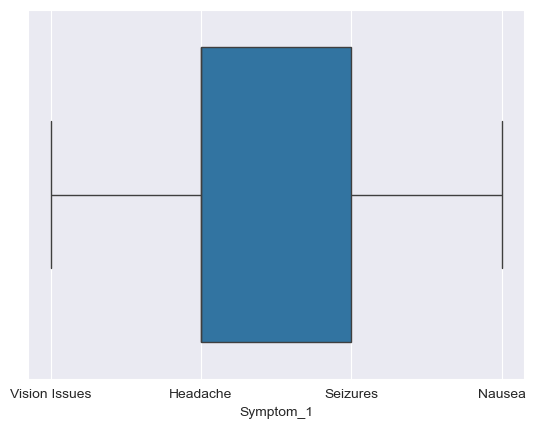

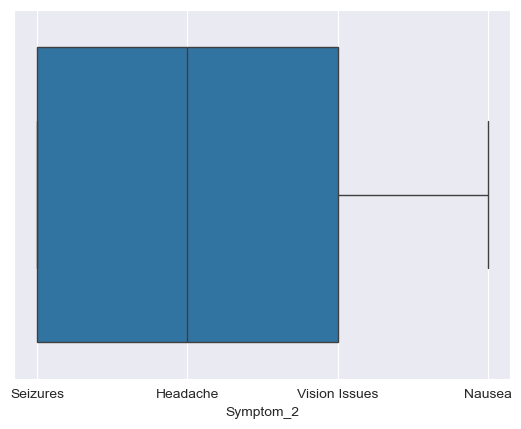

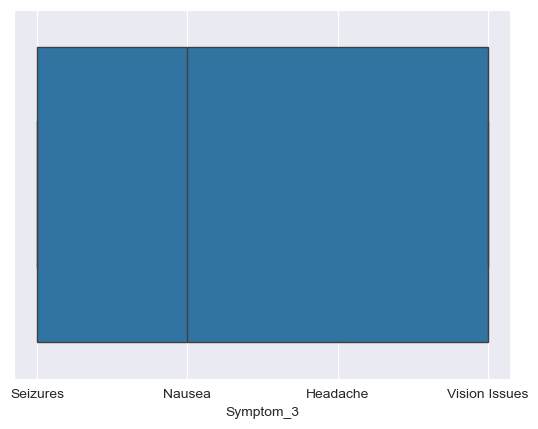

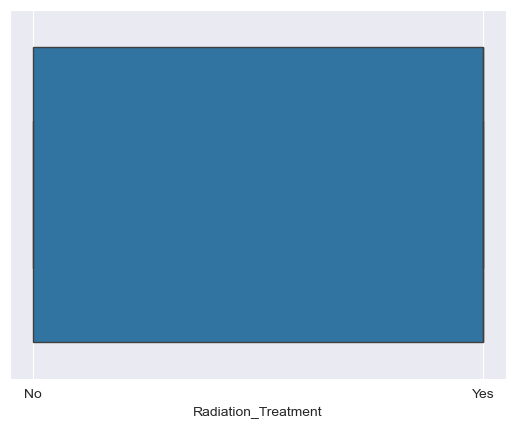

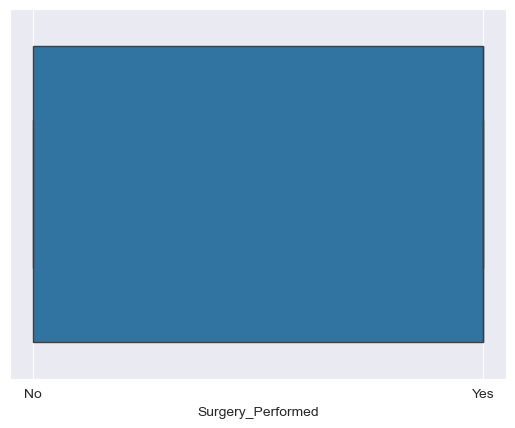

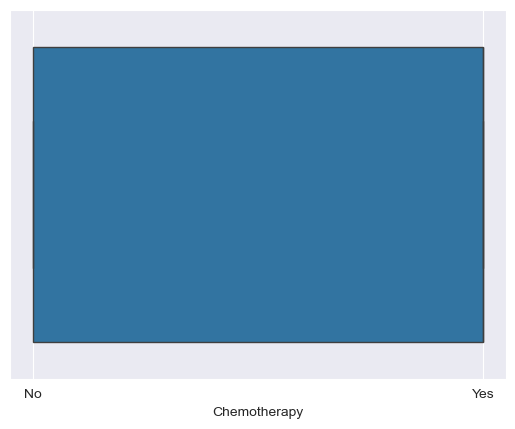

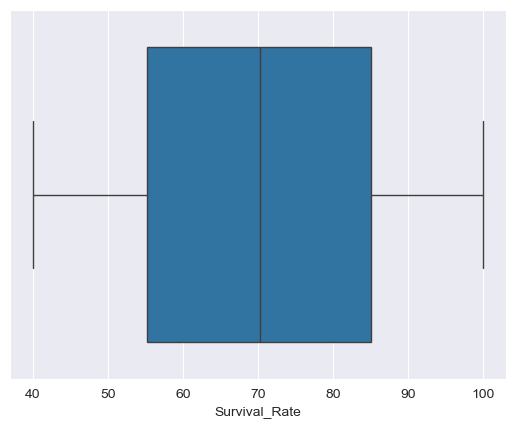

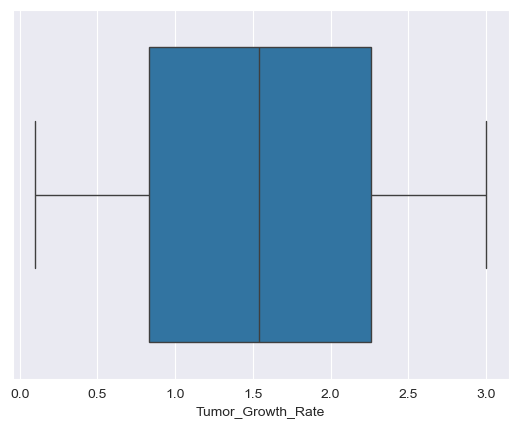

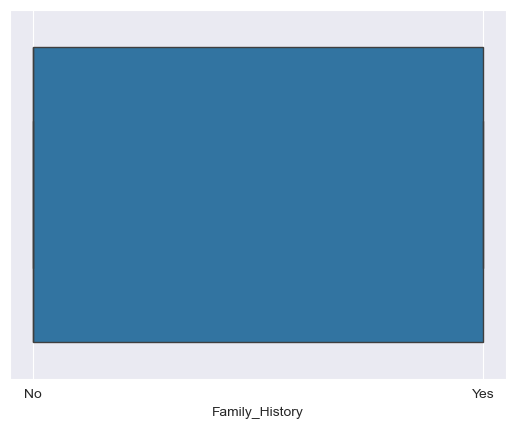

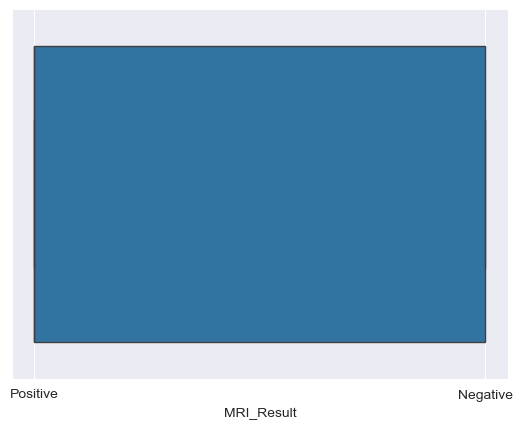

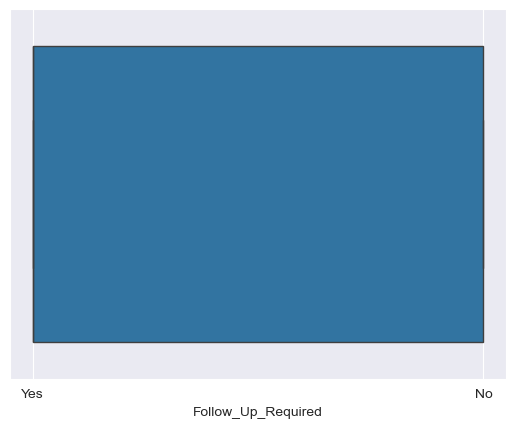

In [7]:
for col in df.columns:
    sns.boxplot(data = df, x=col)
    plt.show()

In [8]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(categorical_cols)


['Gender', 'Tumor_Type', 'Location', 'Histology', 'Stage', 'Symptom_1', 'Symptom_2', 'Symptom_3', 'Radiation_Treatment', 'Surgery_Performed', 'Chemotherapy', 'Family_History', 'MRI_Result', 'Follow_Up_Required']


In [9]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [14]:
df

,Patient_ID,Age,Gender,Tumor_Type,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result,Follow_Up_Required
0,1,73,Male,Malignant,5.375612,Temporal,Astrocytoma,III,Vision Issues,Seizures,Seizures,No,No,No,51.312579,0.111876,No,Positive,Yes
1,2,26,Male,Benign,4.847098,Parietal,Glioblastoma,II,Headache,Headache,Nausea,Yes,Yes,Yes,46.373273,2.165736,Yes,Positive,Yes
2,3,31,Male,Benign,5.588391,Parietal,Meningioma,I,Vision Issues,Headache,Seizures,No,No,No,47.072221,1.884228,No,Negative,No
3,4,29,Male,Malignant,1.436600,Temporal,Medulloblastoma,IV,Vision Issues,Seizures,Headache,Yes,No,Yes,51.853634,1.283342,Yes,Negative,No
4,5,54,Female,Benign,2.417506,Parietal,Glioblastoma,I,Headache,Headache,Seizures,No,No,Yes,54.708987,2.069477,No,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,21,Male,Malignant,9.612013,Parietal,Medulloblastoma,III,Seizures,Nausea,Vision Issues,No,No,Yes,58.229662,0.353806,No,Negative,Yes
19996,19997,32,Female,Benign,1.543560,Temporal,Meningioma,III,Headache,Headache,Vision Issues,Yes,Yes,No,77.706856,2.341074,No,Positive,No
19997,19998,57,Female,Benign,3.618634,Temporal,Medulloblastoma,I,Seizures,Vision Issues,Nausea,No,No,Yes,89.543803,2.332881,No,Positive,Yes
19998,19999,68,Male,Malignant,8.519086,Parietal,Glioblastoma,III,Seizures,Headache,Vision Issues,Yes,Yes,Yes,83.306781,2.387202,No,Positive,No


In [15]:
df.describe()

,Patient_ID,Age,Tumor_Size,Survival_Rate,Tumor_Growth_Rate
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,10000.500000,49.433700,5.236552,70.131699,1.547701
std,5773.647028,17.389296,2.754359,17.270834,0.835995
min,1.000000,20.000000,0.500410,40.002386,0.100017
25%,5000.750000,34.000000,2.836686,55.224439,0.830433
50%,10000.500000,49.000000,5.200675,70.305066,1.541821
75%,15000.250000,65.000000,7.624299,85.043395,2.262484
max,20000.000000,79.000000,9.999420,99.998125,2.999835


In [16]:
print(df[categorical_cols].nunique())

Gender                 2
Tumor_Type             2
Location               4
Histology              4
Stage                  4
Symptom_1              4
Symptom_2              4
Symptom_3              4
Radiation_Treatment    2
Surgery_Performed      2
Chemotherapy           2
Family_History         2
MRI_Result             2
Follow_Up_Required     2
dtype: int64


In [45]:
df['Follow_Up_Required'].value_counts()

SyntaxError: EOL while scanning string literal (1309588848.py, line 1)

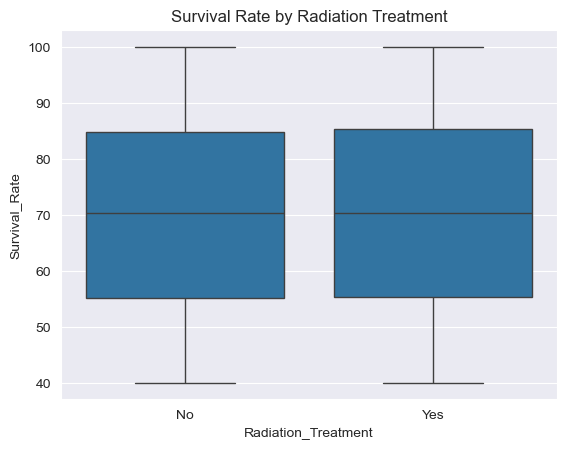

In [18]:
sns.boxplot(x='Radiation_Treatment', y='Survival_Rate', data=df)
plt.title('Survival Rate by Radiation Treatment')
plt.show()


In [19]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr()[['Follow_Up_Required']], annot=True, cmap='viridis')
plt.title('Correlation with Follow Up Required')
plt.show()


ValueError: could not convert string to float: 'Male'

<Figure size 1000x600 with 0 Axes>

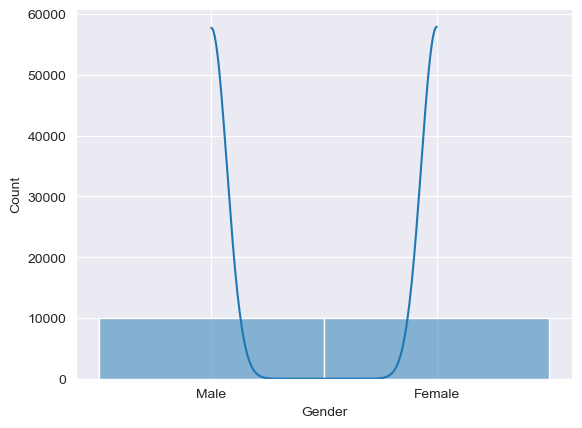

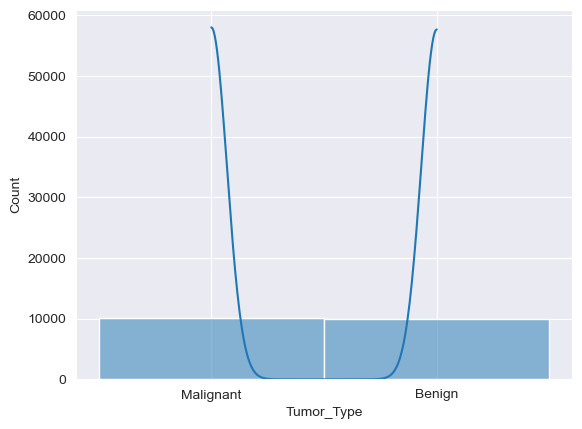

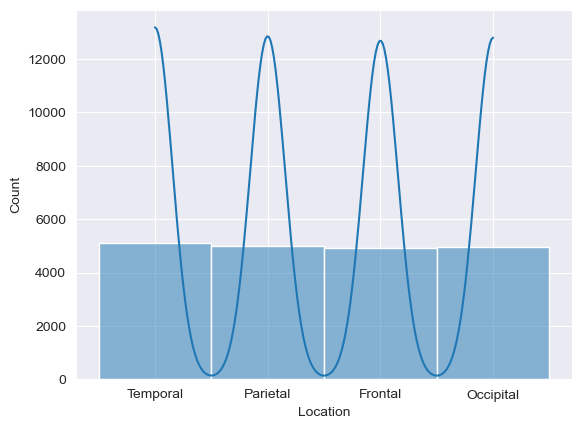

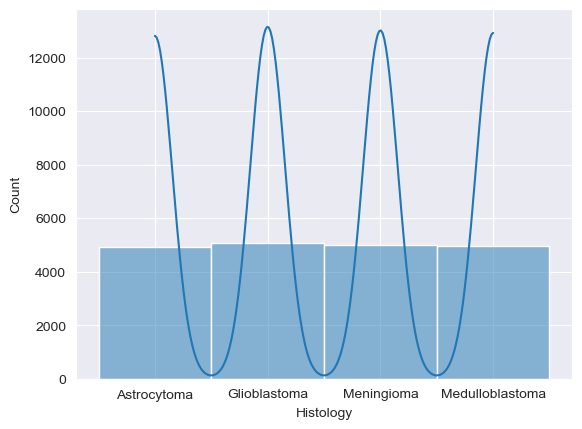

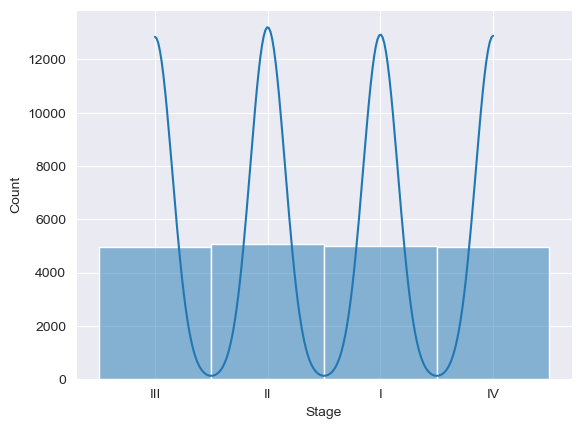

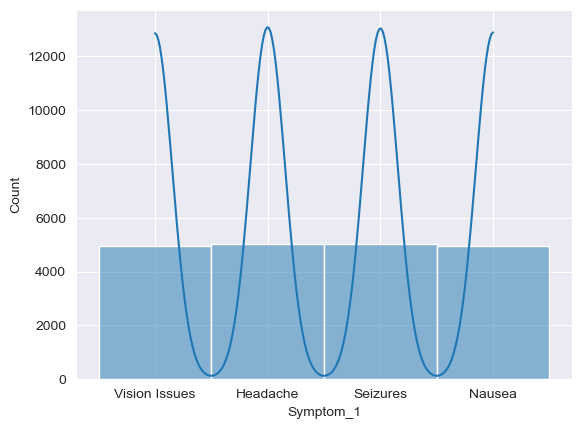

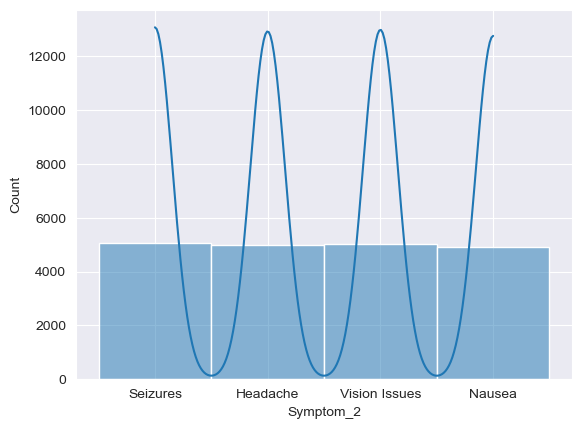

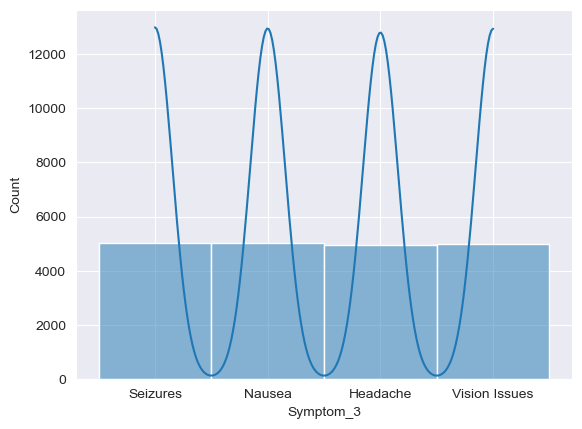

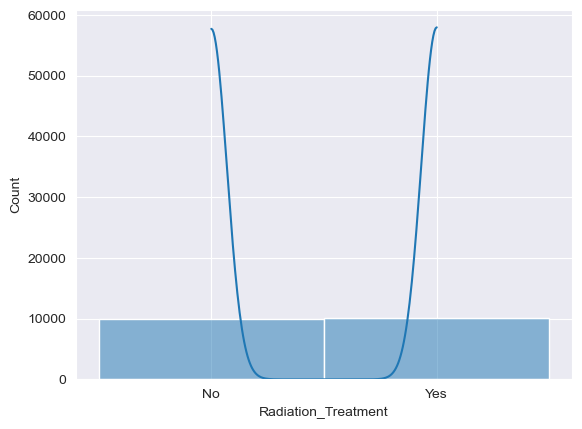

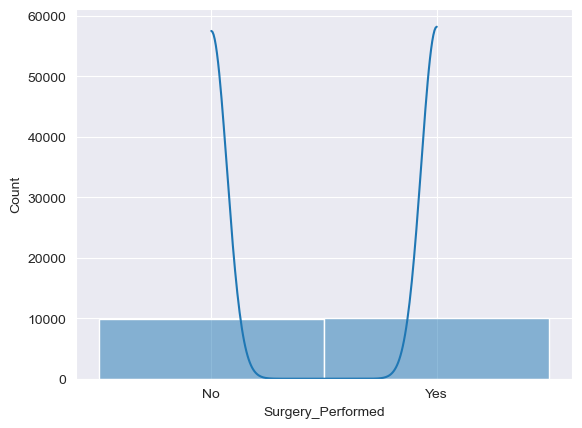

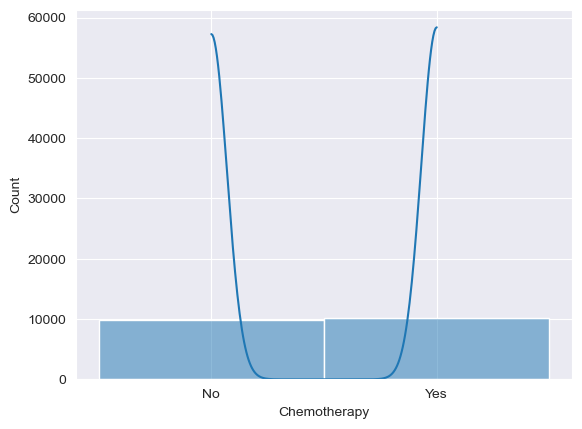

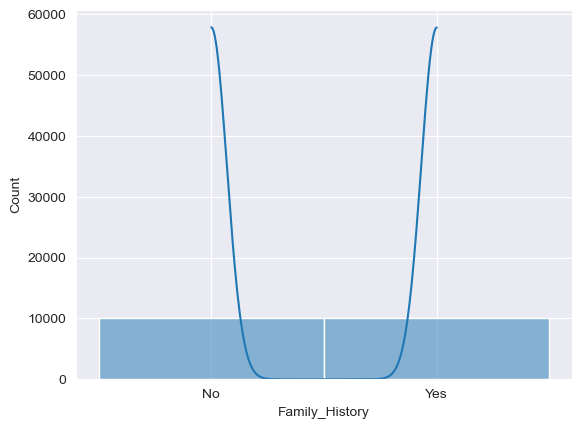

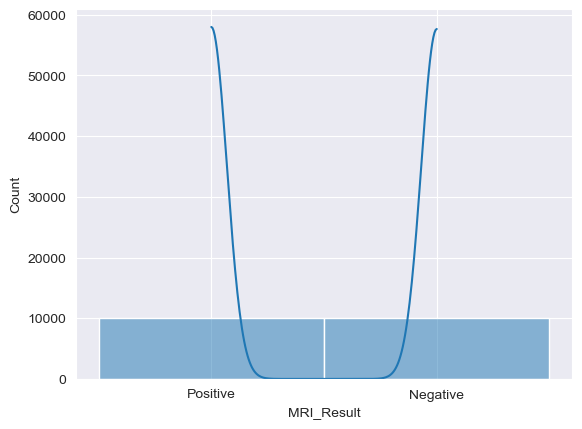

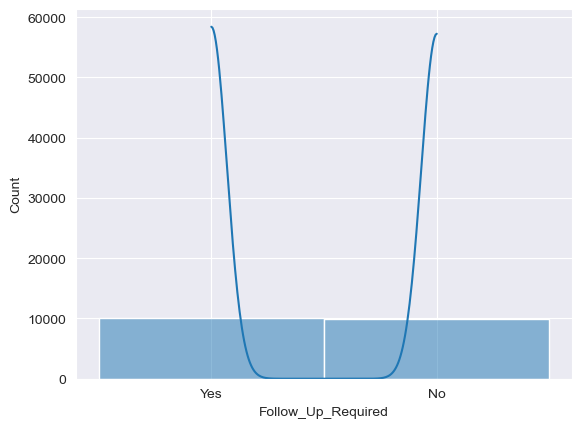

In [44]:
for col in categorical_cols:
    sns.histplot(data = df, x=col, kde=30)
    plt.show()

In [25]:
X = df.drop('Tumor_Type', axis=1)
y = df['Tumor_Type']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [27]:
X_train

,Patient_ID,Age,Gender,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result,Follow_Up_Required
17218,17219,69,Male,1.466639,Occipital,Glioblastoma,IV,Seizures,Headache,Seizures,No,No,No,88.554940,1.760554,No,Positive,Yes
15188,15189,74,Male,1.231541,Temporal,Glioblastoma,III,Nausea,Vision Issues,Headache,Yes,No,Yes,89.613276,2.310762,Yes,Negative,Yes
11295,11296,31,Male,5.340939,Occipital,Astrocytoma,IV,Headache,Nausea,Seizures,No,No,Yes,40.636728,2.673835,Yes,Negative,Yes
19772,19773,33,Male,0.521783,Frontal,Medulloblastoma,I,Headache,Headache,Headache,No,Yes,Yes,87.864727,1.522874,Yes,Negative,No
13072,13073,54,Male,4.714079,Temporal,Astrocytoma,III,Seizures,Headache,Nausea,Yes,Yes,No,79.154867,2.901818,No,Negative,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,11285,53,Female,8.574564,Frontal,Meningioma,I,Headache,Vision Issues,Seizures,No,Yes,Yes,64.500978,1.801410,No,Negative,No
11964,11965,30,Female,8.542621,Occipital,Glioblastoma,IV,Headache,Vision Issues,Headache,No,Yes,No,59.811256,2.859699,No,Negative,No
5390,5391,39,Female,4.494778,Frontal,Glioblastoma,I,Seizures,Headache,Headache,Yes,No,No,83.809921,2.680145,No,Negative,Yes
860,861,38,Male,1.018247,Temporal,Meningioma,I,Vision Issues,Headache,Vision Issues,No,No,Yes,97.815429,1.272110,No,Negative,No


In [28]:
X_test

,Patient_ID,Age,Gender,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result,Follow_Up_Required
10650,10651,60,Male,4.185355,Temporal,Meningioma,II,Nausea,Headache,Nausea,No,No,Yes,94.739701,0.128492,No,Positive,Yes
2041,2042,29,Female,6.391747,Temporal,Meningioma,I,Nausea,Vision Issues,Seizures,Yes,No,Yes,49.751461,1.724219,Yes,Positive,No
8668,8669,28,Male,1.129997,Parietal,Glioblastoma,IV,Vision Issues,Seizures,Vision Issues,Yes,Yes,Yes,95.452798,1.228702,Yes,Positive,Yes
1114,1115,69,Female,2.188328,Temporal,Astrocytoma,II,Vision Issues,Headache,Headache,Yes,No,No,92.178737,1.096059,No,Negative,Yes
13902,13903,69,Female,5.847122,Frontal,Astrocytoma,II,Headache,Nausea,Seizures,Yes,No,No,90.654556,2.415105,No,Negative,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4464,4465,45,Female,4.840083,Parietal,Medulloblastoma,I,Nausea,Seizures,Headache,No,No,Yes,54.102919,0.188170,Yes,Positive,Yes
15656,15657,28,Female,3.469303,Parietal,Astrocytoma,III,Nausea,Nausea,Seizures,No,No,Yes,44.129585,2.904345,Yes,Positive,No
19146,19147,70,Female,5.425820,Temporal,Glioblastoma,II,Nausea,Headache,Nausea,No,No,Yes,81.490349,2.716306,Yes,Positive,Yes
10567,10568,31,Female,7.958618,Parietal,Meningioma,II,Vision Issues,Seizures,Seizures,No,Yes,Yes,55.822710,2.608976,No,Negative,Yes


In [35]:
y_test


10650    Malignant
2041     Malignant
8668     Malignant
1114        Benign
13902    Malignant
           ...    
4464     Malignant
15656    Malignant
19146       Benign
10567    Malignant
9165        Benign
Name: Tumor_Type, Length: 6000, dtype: object

In [36]:
y_train

17218       Benign
15188    Malignant
11295       Benign
19772       Benign
13072    Malignant
           ...    
11284    Malignant
11964       Benign
5390     Malignant
860         Benign
15795    Malignant
Name: Tumor_Type, Length: 14000, dtype: object

In [49]:


oe = OrdinalEncoder()

y_train_enc = oe.fit_transform(y_train.to_numpy().reshape(-1, 1))
y_test_enc = oe.transform(y_test.to_numpy().reshape(-1, 1))



In [52]:
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ]
)

# RFC pipeline
rfc_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

rfc_pipeline.fit(X_train, y_train)
y_pred = rfc_pipeline.predict(X_test)
print("RandomForest Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# CatBoost pipeline (CatBoost can handle categorical features directly, but for uniformity let's preprocess)
cat_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', CatBoostClassifier(iterations=1000, learning_rate=0.03, depth=8, verbose=0, random_state=42))
])

cat_pipeline.fit(X_train, y_train)
y_pred = cat_pipeline.predict(X_test)
print("CatBoost Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



RandomForest Accuracy: 0.4995
              precision    recall  f1-score   support

      Benign       0.49      0.52      0.51      2962
   Malignant       0.51      0.47      0.49      3038

    accuracy                           0.50      6000
   macro avg       0.50      0.50      0.50      6000
weighted avg       0.50      0.50      0.50      6000

CatBoost Accuracy: 0.5058333333333334
              precision    recall  f1-score   support

      Benign       0.50      0.50      0.50      2962
   Malignant       0.51      0.51      0.51      3038

    accuracy                           0.51      6000
   macro avg       0.51      0.51      0.51      6000
weighted avg       0.51      0.51      0.51      6000



In [62]:
print(X.columns)


Index(['Patient_ID', 'Age', 'Gender', 'Tumor_Size', 'Location', 'Histology',
       'Stage', 'Symptom_1', 'Symptom_2', 'Symptom_3', 'Radiation_Treatment',
       'Surgery_Performed', 'Chemotherapy', 'Survival_Rate',
       'Tumor_Growth_Rate', 'Family_History', 'MRI_Result',
       'Follow_Up_Required'],
      dtype='object')


In [33]:
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 1000)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.1)
    depth = trial.suggest_int('depth', 3, 10)
    
    
    model = CatBoostClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        depth=depth,
        verbose=0,
        random_state=42
    )
    
    return cross_val_score(model, X_train, y_train, scoring='accuracy', cv=3).mean()

In [ ]:
def objective(trial):
    #criterion = trial.suggest_categorical("criterion", ["mse", "mae"])
    max_depth = trial.suggest_int("max_depth", 1, 10)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)
    min_weight_fraction_leaf = trial.suggest_float("min_weight_fraction_leaf", 0, 0.5)
    #max_features = trial.suggest_categorical("max_features", ["auto", "sqrt", "log2"])
    ccp_alpha = trial.suggest_float("ccp_alpha", 0, 1)
    max_leaf_nodes = trial.suggest_int("max_leaf_nodes", 2, 10)
    min_impurity_decrease = trial.suggest_float("min_impurity_decrease", 0, 1)
    main_pipe_dt = Pipeline([
        ("preprocessor", ColumnTransformer([
            ("num", num_pipe, num_cols),
            ("cat", cat_pipe, cat_cols)
        ])),

        ("dt", DecisionTreeRegressor(max_depth=max_depth, min_samples_split=min_samples_split,
                                     min_samples_leaf=min_samples_leaf,
                                     min_weight_fraction_leaf=min_weight_fraction_leaf, ccp_alpha=ccp_alpha,
                                     max_leaf_nodes=max_leaf_nodes, min_impurity_decrease=min_impurity_decrease,
                                     random_state=42))
    ])

    scores = cross_val_score(main_pipe_dt, X_train, y_train, cv=5, scoring="neg_mean_squared_error").mean()

    return -np.mean(scores)






In [32]:
num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [33]:
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

In [37]:
def objective(trial):
    criterion = trial.suggest_categorical("criterion", ["gini", "entropy"])
    max_depth = trial.suggest_int("max_depth", 1, 32)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)
    max_features = trial.suggest_categorical("max_features", ["sqrt", "log2", None])
    class_weight = trial.suggest_categorical("class_weight", ["balanced", None])
    ccp_alpha = trial.suggest_float("ccp_alpha", 0, 0.1, step=0.01)  # 0-1 might be too wide

    main_pipe_dtc = Pipeline([ 
        ("preprocessor", ColumnTransformer([
            ("num", num_pipe, num_cols),
            ("cat", cat_pipe, cat_cols)
        ])),

        ("dtc", DecisionTreeClassifier(
            criterion=criterion,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            max_features=max_features,
            class_weight=class_weight,
            random_state=42,
            ccp_alpha=ccp_alpha
        ))
    ])

    scores = cross_val_score(main_pipe_dtc, X_train, y_train, cv=5, scoring="accuracy").mean()
    trial.set_user_attr("cv_score", scores)
    return scores



study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20
               )
print("Best params:", study.best_params)
print("Best score:", study.best_value)



[I 2025-03-21 22:32:45,033] A new study created in memory with name: no-name-1ff7951a-470d-483f-b37a-0ba2a544f68a
[I 2025-03-21 22:32:45,759] Trial 0 finished with value: 0.5051428571428571 and parameters: {'criterion': 'gini', 'max_depth': 13, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'log2', 'class_weight': None, 'ccp_alpha': 0.03}. Best is trial 0 with value: 0.5051428571428571.
[I 2025-03-21 22:32:46,079] Trial 1 finished with value: 0.5051428571428571 and parameters: {'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 6, 'min_samples_leaf': 8, 'max_features': 'log2', 'class_weight': 'balanced', 'ccp_alpha': 0.1}. Best is trial 0 with value: 0.5051428571428571.
[I 2025-03-21 22:32:46,889] Trial 2 finished with value: 0.5051428571428571 and parameters: {'criterion': 'entropy', 'max_depth': 17, 'min_samples_split': 4, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'class_weight': 'balanced', 'ccp_alpha': 0.05}. Best is trial 0 with value: 0.505142857142857

Best params: {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'log2', 'class_weight': 'balanced', 'ccp_alpha': 0.0}
Best score: 0.5146428571428572


In [38]:
print("Best params:", study.best_params)

Best params: {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'log2', 'class_weight': 'balanced', 'ccp_alpha': 0.0}


In [39]:
study.best_params

{'criterion': 'gini',
 'max_depth': 2,
 'min_samples_split': 6,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'class_weight': 'balanced',
 'ccp_alpha': 0.0}

In [40]:
main_pipe_dtc = Pipeline([
    ("preprocessor", ColumnTransformer([
        ("num", num_pipe, num_cols),
        ("cat", cat_pipe, cat_cols)
    ])),

    ("dt", DecisionTreeClassifier(**study.best_params, random_state=42))
])
main_pipe_dtc.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Gender',
                                                   'Tumor_Type', 'Tumor_Size',
                                                   'Location', 'Histology',
                                                   'Stage', 'Symptom_1',
                                                   'Symptom_2', 'Symptom_3',
                                                   'Radiation_Treatment',
                                                   'Surgery_Performed',
                                                   'Chemotherapy',
                                                   'Survival_Rate',
                                                   'Tumor_Growth_Rate',
                                                   'Family_History',
                                                   'MRI_Result']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [])])),
                ('dt',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=2,
                                        max_features='log2',
                                        min_samples_split=6,
                                        random_state=42))])

In [41]:
accuracy_score = main_pipe_dtc.score(X_test, y_test)
dtc_report = classification_report(y_test, main_pipe_dtc.predict(X_test))

In [42]:
dtc_report

'              precision    recall  f1-score   support\n\n           0       0.50      0.45      0.47      2971\n           1       0.51      0.55      0.53      3029\n\n    accuracy                           0.50      6000\n   macro avg       0.50      0.50      0.50      6000\nweighted avg       0.50      0.50      0.50      6000\n'

In [43]:
accuracy_score

0.5018333333333334

In [65]:
df

,Patient_ID,Age,Gender,Tumor_Type,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result,Follow_Up_Required
0,1,73,Male,Malignant,5.375612,Temporal,Astrocytoma,III,Vision Issues,Seizures,Seizures,No,No,No,51.312579,0.111876,No,Positive,Yes
1,2,26,Male,Benign,4.847098,Parietal,Glioblastoma,II,Headache,Headache,Nausea,Yes,Yes,Yes,46.373273,2.165736,Yes,Positive,Yes
2,3,31,Male,Benign,5.588391,Parietal,Meningioma,I,Vision Issues,Headache,Seizures,No,No,No,47.072221,1.884228,No,Negative,No
3,4,29,Male,Malignant,1.436600,Temporal,Medulloblastoma,IV,Vision Issues,Seizures,Headache,Yes,No,Yes,51.853634,1.283342,Yes,Negative,No
4,5,54,Female,Benign,2.417506,Parietal,Glioblastoma,I,Headache,Headache,Seizures,No,No,Yes,54.708987,2.069477,No,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,21,Male,Malignant,9.612013,Parietal,Medulloblastoma,III,Seizures,Nausea,Vision Issues,No,No,Yes,58.229662,0.353806,No,Negative,Yes
19996,19997,32,Female,Benign,1.543560,Temporal,Meningioma,III,Headache,Headache,Vision Issues,Yes,Yes,No,77.706856,2.341074,No,Positive,No
19997,19998,57,Female,Benign,3.618634,Temporal,Medulloblastoma,I,Seizures,Vision Issues,Nausea,No,No,Yes,89.543803,2.332881,No,Positive,Yes
19998,19999,68,Male,Malignant,8.519086,Parietal,Glioblastoma,III,Seizures,Headache,Vision Issues,Yes,Yes,Yes,83.306781,2.387202,No,Positive,No


<Axes: xlabel='Tumor_Type', ylabel='Count'>

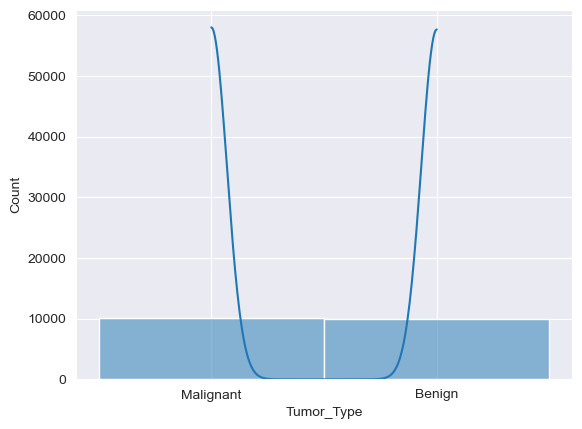

In [66]:
sns.histplot(data = df, x='Tumor_Type', kde=30)